<a href="https://colab.research.google.com/github/7u7unn/Propeller-Geometry-Optimization/blob/main/Propeller_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing**


1.   Data Exploration
2.   Data Transformation
3. Data Visualization



In [ ]:
import os
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import pandas as pd
import numpy as np
path = '/content/MyDrive/MyDrive/bersihcuy.csv'

df = pd.read_csv(path)
print(df.head())
print(df.info())

   Unnamed: 0             PropName        BladeName Family_exp  B  D_exp  \
0           0  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
1           1  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
2           2  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
3           3  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
4           4  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   

   P_exp      J       N      CT      CP    eta Family_geom  D_geom  P_geom  \
0    5.0  0.158  4007.0  0.0886  0.0458  0.306     apc29ff     9.0     5.0   
1    5.0  0.200  4007.0  0.0854  0.0459  0.371     apc29ff     9.0     5.0   
2    5.0  0.242  4007.0  0.0805  0.0456  0.428     apc29ff     9.0     5.0   
3    5.0  0.274  4007.0  0.0765  0.0451  0.466     apc29ff     9.0     5.0   
4    5.0  0.327  4007.0  0.0671  0.0430  0.510     apc29ff     9.0     5.0   

                                                 r/R  \
0  [0.15, 0.2, 0.2

In [ ]:
import ast

# Function to safely convert string representation of list to actual list
def parse_list_string(list_string):
    try:
        return ast.literal_eval(list_string)
    except (ValueError, SyntaxError):
        return [] # Return an empty list if parsing fails

# Apply the parsing function to 'c/R' and 'beta' columns
df['c/R_list'] = df['c/R'].apply(parse_list_string)
df['beta_list'] = df['beta'].apply(parse_list_string)

# Create new columns for c/R0 to c/R17
for i in range(18):
    df[f'c/R{i}'] = df['c/R_list'].apply(lambda x: x[i] if i < len(x) else np.nan)

# Create new columns for beta0 to beta17
for i in range(18):
    df[f'beta{i}'] = df['beta_list'].apply(lambda x: x[i] if i < len(x) else np.nan)

# Drop the original 'c/R', 'beta', and the temporary '_list' columns if no longer needed
df = df.drop(columns=['c/R', 'beta', 'c/R_list', 'beta_list'])

print("Kolom c/R dan beta telah dipecah menjadi kolom individu.")
print(df.head())

Kolom c/R dan beta telah dipecah menjadi kolom individu.
   Unnamed: 0             PropName        BladeName Family_exp  B  D_exp  \
0           0  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
1           1  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
2           2  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
3           3  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   
4           4  apc29ff 9.0x5.0 - 2  apc29ff 9.0x5.0    apc29ff  2    9.0   

   P_exp      J       N      CT  ...  beta8  beta9 beta10  beta11  beta12  \
0    5.0  0.158  4007.0  0.0886  ...  20.02  18.49  17.06   15.95   14.87   
1    5.0  0.200  4007.0  0.0854  ...  20.02  18.49  17.06   15.95   14.87   
2    5.0  0.242  4007.0  0.0805  ...  20.02  18.49  17.06   15.95   14.87   
3    5.0  0.274  4007.0  0.0765  ...  20.02  18.49  17.06   15.95   14.87   
4    5.0  0.327  4007.0  0.0671  ...  20.02  18.49  17.06   15.95   14.87   

  beta13  beta14  beta1

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)



In [ ]:
# Performance columns
performance_cols = ['CT', 'CP', 'eta']

# Operating conditions
operating_cols = ['J', 'N']

# Geometry (using _exp as primary)
geometry_cols = ['D_exp', 'P_exp', 'B']

# c/R columns (18 values)
cR_cols = [f'c/R{i}' for i in range(18)]

# beta columns (18 values)
beta_cols = [f'beta{i}' for i in range(18)]

# Identifiers
id_cols = ['PropName', 'BladeName', 'Family_exp']

print("Column groups identified:")
print(f"  Performance: {performance_cols}")
print(f"  Operating: {operating_cols}")
print(f"  Geometry: {geometry_cols}")
print(f"  c/R profiles: {len(cR_cols)} columns")
print(f"  beta profiles: {len(beta_cols)} columns")
print(f"  Identifiers: {id_cols}")

Column groups identified:
  Performance: ['CT', 'CP', 'eta']
  Operating: ['J', 'N']
  Geometry: ['D_exp', 'P_exp', 'B']
  c/R profiles: 18 columns
  beta profiles: 18 columns
  Identifiers: ['PropName', 'BladeName', 'Family_exp']


In [ ]:
print("="*70)
print("PERFORMANCE VARIABLES STATISTICS")
print("="*70)

performance_cols = ['CT', 'CP', 'eta']
print(df[performance_cols].describe())

print("\nAdditional statistics:")
for col in performance_cols:
    print(f"\n{col}:")
    print(f"  Missing values: {df[col].isna().sum()}")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Min: {df[col].min():.6f}")
    print(f"  Max: {df[col].max():.6f}")
    print(f"  Mean: {df[col].mean():.6f}")
    print(f"  Median: {df[col].median():.6f}")

PERFORMANCE VARIABLES STATISTICS
                 CT            CP           eta
count  14211.000000  14211.000000  14211.000000
mean       0.066648      0.046955      0.300204
std        0.046506      0.024939      0.572397
min       -0.126140      0.004300    -22.698791
25%        0.031653      0.029600      0.105926
50%        0.068520      0.044416      0.442000
75%        0.099400      0.059100      0.594000
max        0.253789      0.192791      0.762000

Additional statistics:

CT:
  Missing values: 0
  Unique values: 6205
  Min: -0.126140
  Max: 0.253789
  Mean: 0.066648
  Median: 0.068520

CP:
  Missing values: 0
  Unique values: 5216
  Min: 0.004300
  Max: 0.192791
  Mean: 0.046955
  Median: 0.044416

eta:
  Missing values: 0
  Unique values: 4742
  Min: -22.698791
  Max: 0.762000
  Mean: 0.300204
  Median: 0.442000


In [ ]:
print("="*70)
print("NEGATIVE VALUE ANALYSIS")
print("="*70)

performance_cols = ['CT', 'CP', 'eta']

for col in performance_cols:
    n_negative = (df[col] < 0).sum()
    pct_negative = (n_negative / len(df)) * 100

    print(f"\n{col}:")
    print(f"  Total rows: {len(df)}")
    print(f"  Negative values: {n_negative} ({pct_negative:.2f}%)")
    print(f"  Positive values: {(df[col] >= 0).sum()} ({100-pct_negative:.2f}%)")

    if n_negative > 0:
        print(f"  Min (negative): {df[df[col] < 0][col].min():.6f}")
        print(f"  Max (negative): {df[df[col] < 0][col].max():.6f}")

        # Show sample of negative values
        print(f"\n  Sample rows with negative {col}:")
        sample_neg = df[df[col] < 0][['BladeName', 'J', 'N', 'CT', 'CP', 'eta']].head(3)
        print(sample_neg)

NEGATIVE VALUE ANALYSIS

CT:
  Total rows: 14211
  Negative values: 1077 (7.58%)
  Positive values: 13134 (92.42%)
  Min (negative): -0.126140
  Max (negative): -0.000074

  Sample rows with negative CT:
          BladeName      J       N      CT      CP    eta
14  apc29ff 9.0x5.0  0.728  4007.0 -0.0008  0.0089 -0.067
60  apc29ff 9.0x5.0  0.747  6014.0 -0.0023  0.0075 -0.235
93  apc29ff 9.0x5.0  0.741  6917.0 -0.0017  0.0077 -0.166

CP:
  Total rows: 14211
  Negative values: 0 (0.00%)
  Positive values: 14211 (100.00%)

eta:
  Total rows: 14211
  Negative values: 1077 (7.58%)
  Positive values: 13134 (92.42%)
  Min (negative): -22.698791
  Max (negative): -0.001279

  Sample rows with negative eta:
          BladeName      J       N      CT      CP    eta
14  apc29ff 9.0x5.0  0.728  4007.0 -0.0008  0.0089 -0.067
60  apc29ff 9.0x5.0  0.747  6014.0 -0.0023  0.0075 -0.235
93  apc29ff 9.0x5.0  0.741  6917.0 -0.0017  0.0077 -0.166


In [ ]:
print("="*70)
print("EFFICIENCY (eta) RANGE ANALYSIS")
print("="*70)

print(f"Total rows: {len(df)}")
print(f"\neta < 0 (negative): {(df['eta'] < 0).sum()} ({(df['eta'] < 0).sum()/len(df)*100:.2f}%)")
print(f"eta = 0 to 1 (valid): {((df['eta'] >= 0) & (df['eta'] <= 1)).sum()} ({((df['eta'] >= 0) & (df['eta'] <= 1)).sum()/len(df)*100:.2f}%)")
print(f"eta > 1 (impossible): {(df['eta'] > 1).sum()} ({(df['eta'] > 1).sum()/len(df)*100:.2f}%)")

if (df['eta'] > 1).sum() > 0:
    print(f"\nSample rows with eta > 1:")
    sample_high = df[df['eta'] > 1][['BladeName', 'J', 'N', 'CT', 'CP', 'eta']].head(3)
    print(sample_high)

EFFICIENCY (eta) RANGE ANALYSIS
Total rows: 14211

eta < 0 (negative): 1077 (7.58%)
eta = 0 to 1 (valid): 13134 (92.42%)
eta > 1 (impossible): 0 (0.00%)


Plot saved as: performance_distributions.png


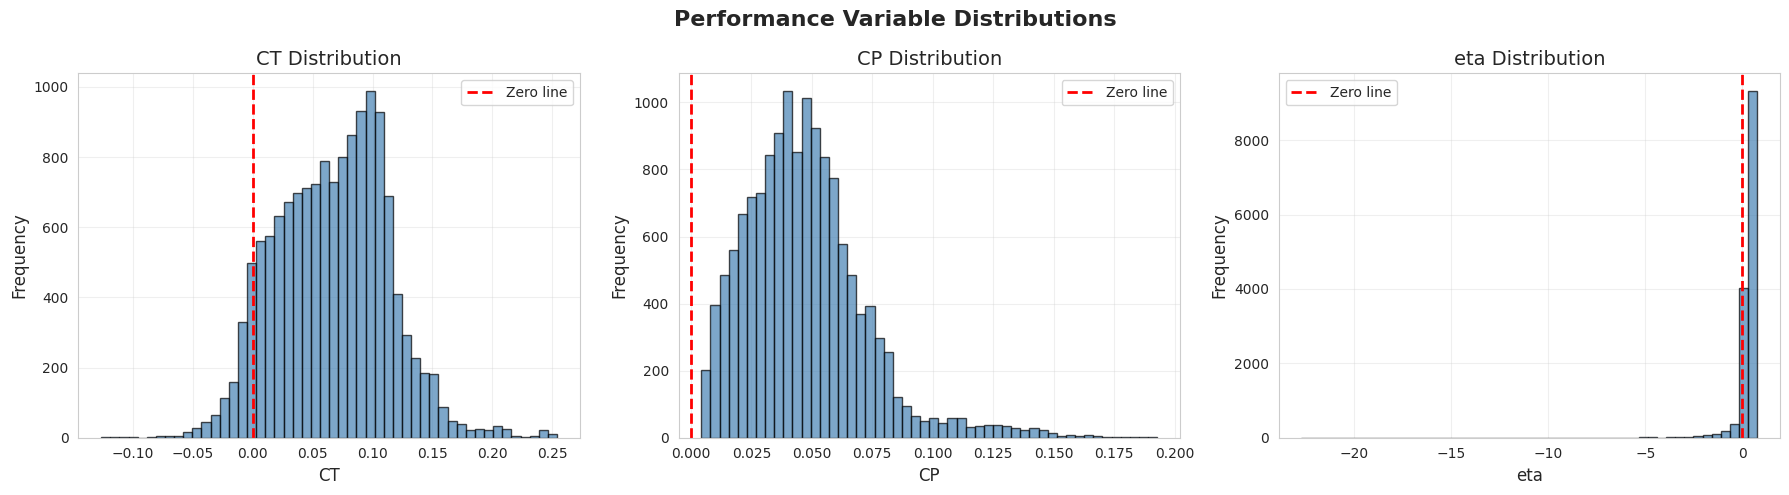

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Performance Variable Distributions', fontsize=16, fontweight='bold')

performance_cols = ['CT', 'CP', 'eta']

for idx, col in enumerate(performance_cols):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero line')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].set_title(f'{col} Distribution', fontsize=14)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('performance_distributions.png', dpi=300, bbox_inches='tight')
print("Plot saved as: performance_distributions.png")
plt.show()

Plot saved as: performance_boxplots.png


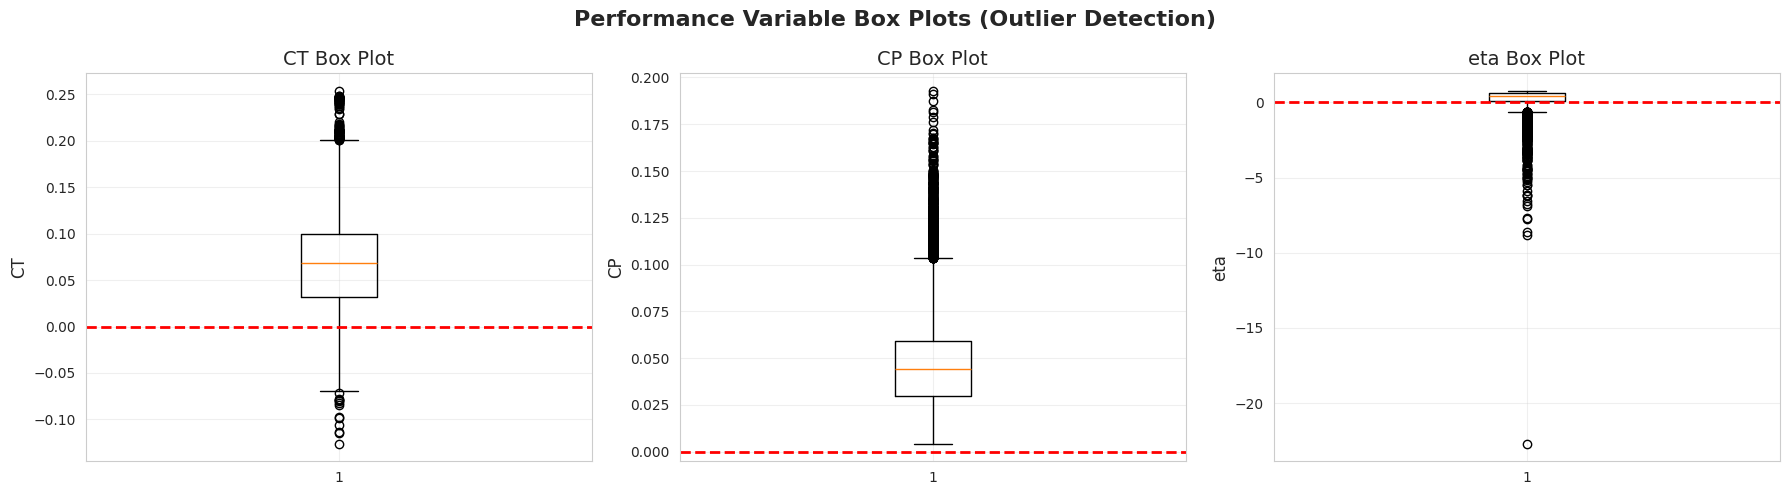

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Performance Variable Box Plots (Outlier Detection)', fontsize=16, fontweight='bold')

performance_cols = ['CT', 'CP', 'eta']

for idx, col in enumerate(performance_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero line')
    axes[idx].set_ylabel(col, fontsize=12)
    axes[idx].set_title(f'{col} Box Plot', fontsize=14)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('performance_boxplots.png', dpi=300, bbox_inches='tight')
print("Plot saved as: performance_boxplots.png")
plt.show()

In [ ]:
print("="*70)
print("BLADES WITH MOST PROBLEMATIC DATA")
print("="*70)

# Flag problematic rows
df['has_negative'] = (df['CT'] < 0) | (df['CP'] < 0) | (df['eta'] < 0)

# Count problems per blade
blade_problems = df.groupby('BladeName').agg({
    'has_negative': 'sum',
    'CT': 'count'
}).rename(columns={'has_negative': 'problematic_rows', 'CT': 'total_rows'})

blade_problems['problem_percentage'] = (blade_problems['problematic_rows'] / blade_problems['total_rows'] * 100).round(2)
blade_problems = blade_problems.sort_values('problem_percentage', ascending=False)

print("\nTop 10 blades with most problematic data:")
print(blade_problems.head(10))

print(f"\nBlades with 100% problematic data: {(blade_problems['problem_percentage'] == 100).sum()}")
print(f"Blades with 0% problematic data: {(blade_problems['problem_percentage'] == 0).sum()}")

BLADES WITH MOST PROBLEMATIC DATA

Top 10 blades with most problematic data:
                problematic_rows  total_rows  problem_percentage
BladeName                                                       
apcsf 11.0x3.8                33         109               30.28
vp 140.0x45.0                 25          88               28.41
gwsdd 2.5x0.8                 64         243               26.34
mi 5.0x3.5                    12          49               24.49
kpf 96.0x70.0                 26         120               21.67
union 9x7.72                  20          93               21.51
gwsdd 2.5x1.0                 18          86               20.93
gwssf 11.0x4.7                22         109               20.18
apcsf 11.0x4.7                24         119               20.17
mas 10.0x5.0                  29         145               20.00

Blades with 100% problematic data: 0
Blades with 0% problematic data: 0


In [ ]:
print("="*70)
print("CLEANING STRATEGY IMPACT ANALYSIS")
print("="*70)

total = len(df)

strategies = {
    'Remove negative CT': df['CT'] >= 0,
    'Remove negative CP': df['CP'] >= 0,
    'Remove negative eta': df['eta'] >= 0,
    'Remove eta > 1': df['eta'] <= 1,
    'Remove any negative performance': ~((df['CT'] < 0) | (df['CP'] < 0) | (df['eta'] < 0)),
    'Remove all issues': (df['CT'] >= 0) & (df['CP'] >= 0) & (df['eta'] >= 0) & (df['eta'] <= 1)
}

print(f"Original dataset: {total} rows\n")

for strategy_name, condition in strategies.items():
    remaining = condition.sum()
    removed = total - remaining
    pct_remaining = (remaining / total) * 100
    pct_removed = (removed / total) * 100

    print(f"{strategy_name}:")
    print(f"  Remaining: {remaining} ({pct_remaining:.2f}%)")
    print(f"  Removed: {removed} ({pct_removed:.2f}%)")
    print()

CLEANING STRATEGY IMPACT ANALYSIS
Original dataset: 14211 rows

Remove negative CT:
  Remaining: 13134 (92.42%)
  Removed: 1077 (7.58%)

Remove negative CP:
  Remaining: 14211 (100.00%)
  Removed: 0 (0.00%)

Remove negative eta:
  Remaining: 13134 (92.42%)
  Removed: 1077 (7.58%)

Remove eta > 1:
  Remaining: 14211 (100.00%)
  Removed: 0 (0.00%)

Remove any negative performance:
  Remaining: 13134 (92.42%)
  Removed: 1077 (7.58%)

Remove all issues:
  Remaining: 13134 (92.42%)
  Removed: 1077 (7.58%)



In [ ]:
print("="*70)
print("CREATING CLEANED DATASET (CONSERVATIVE)")
print("="*70)

# Conservative cleaning: only remove clearly invalid data
df_clean = df.copy()

initial_count = len(df_clean)

# Remove negative CT, CP
df_clean = df_clean[(df_clean['CT'] >= 0) & (df_clean['CP'] >= 0)]
print(f"After removing negative CT/CP: {len(df_clean)} rows ({len(df_clean)/initial_count*100:.2f}% retained)")

# Remove negative eta
df_clean = df_clean[df_clean['eta'] >= 0]
print(f"After removing negative eta: {len(df_clean)} rows ({len(df_clean)/initial_count*100:.2f}% retained)")

# Remove eta > 1
df_clean = df_clean[df_clean['eta'] <= 1]
print(f"After removing eta > 1: {len(df_clean)} rows ({len(df_clean)/initial_count*100:.2f}% retained)")

removed_count = initial_count - len(df_clean)
print(f"\nTotal removed: {removed_count} rows ({removed_count/initial_count*100:.2f}%)")
print(f"Final dataset: {len(df_clean)} rows")

print("\nCleaned dataset statistics:")
print(df_clean[['CT', 'CP', 'eta']].describe())

CREATING CLEANED DATASET (CONSERVATIVE)
After removing negative CT/CP: 13134 rows (92.42% retained)
After removing negative eta: 13134 rows (92.42% retained)
After removing eta > 1: 13134 rows (92.42% retained)

Total removed: 1077 rows (7.58%)
Final dataset: 13134 rows

Cleaned dataset statistics:
                 CT            CP           eta
count  13134.000000  13134.000000  13134.000000
mean       0.073337      0.049629      0.405922
std        0.041581      0.023927      0.236964
min        0.000000      0.008600      0.000000
25%        0.040300      0.033100      0.248280
50%        0.074000      0.046700      0.469000
75%        0.101700      0.060618      0.603606
max        0.253789      0.192791      0.762000


Plot saved as: before_after_cleaning.png


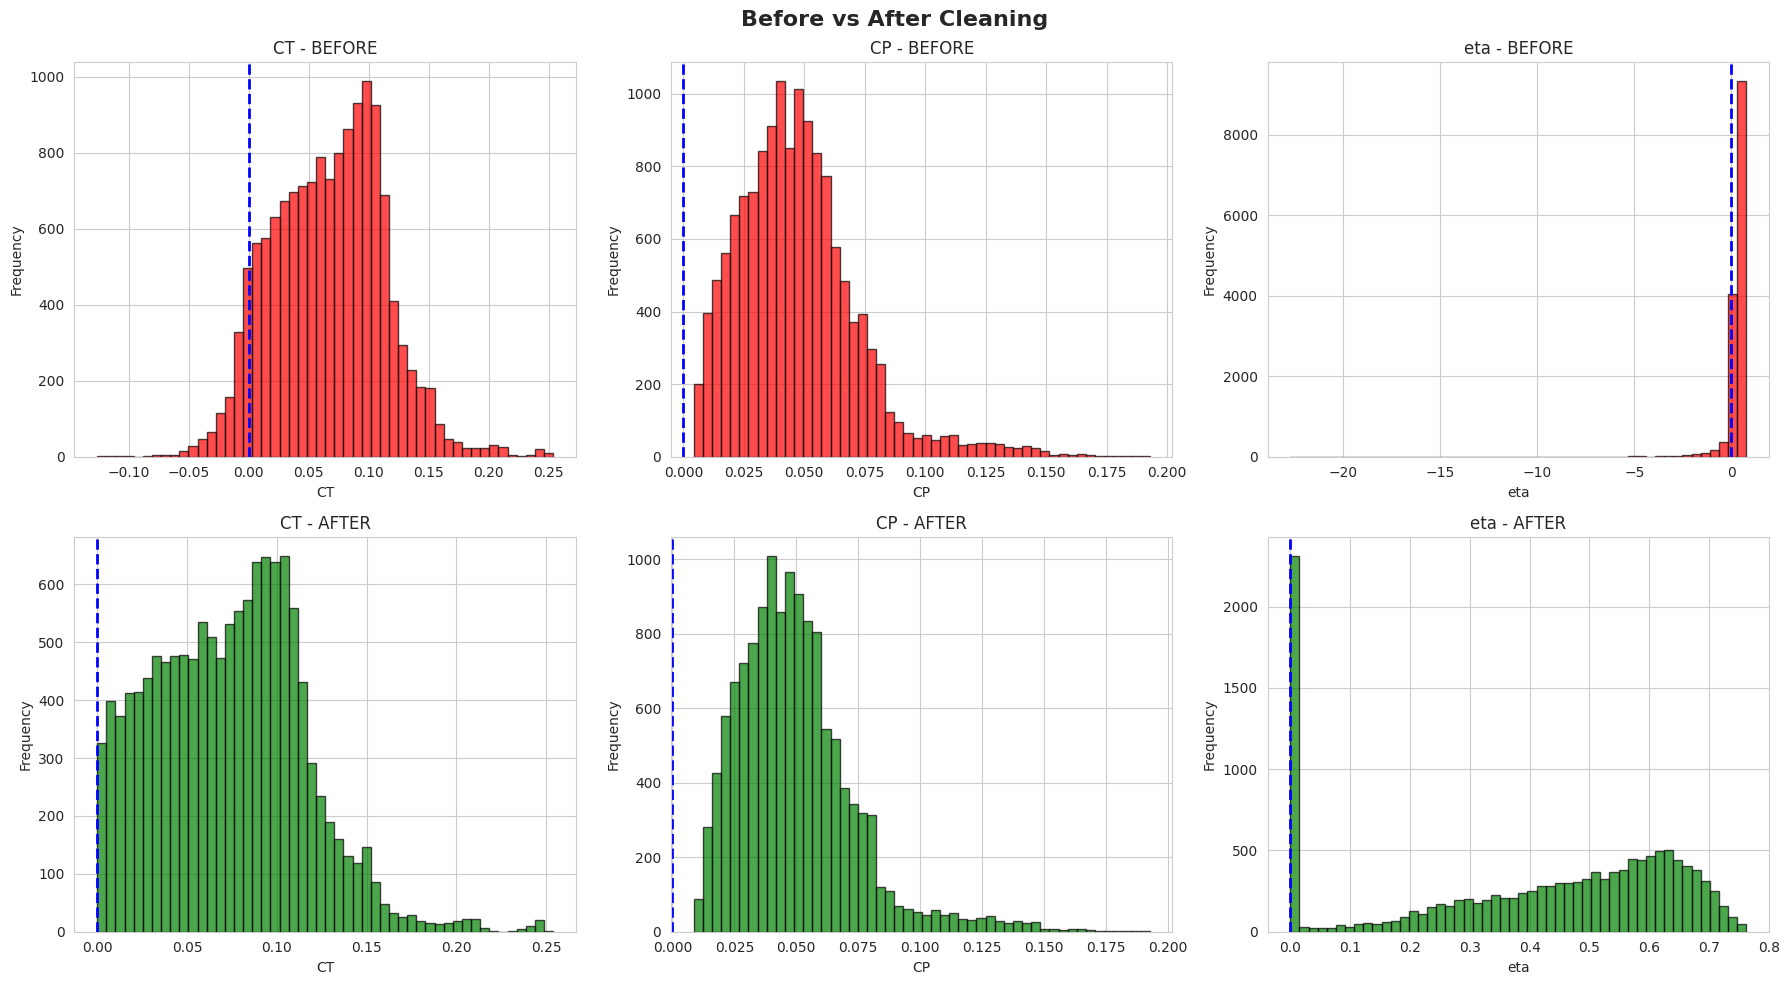

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Before vs After Cleaning', fontsize=16, fontweight='bold')

performance_cols = ['CT', 'CP', 'eta']

for idx, col in enumerate(performance_cols):
    # Before
    axes[0, idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='red')
    axes[0, idx].axvline(0, color='blue', linestyle='--', linewidth=2)
    axes[0, idx].set_title(f'{col} - BEFORE', fontsize=12)
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frequency')

    # After
    axes[1, idx].hist(df_clean[col], bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, idx].axvline(0, color='blue', linestyle='--', linewidth=2)
    axes[1, idx].set_title(f'{col} - AFTER', fontsize=12)
    axes[1, idx].set_xlabel(col)
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('before_after_cleaning.png', dpi=300, bbox_inches='tight')
print("Plot saved as: before_after_cleaning.png")
plt.show()

In [ ]:

# Also save as CSV (optional)
output_csv = 'cleaned_propeller_data.csv'
df_clean.to_csv(output_csv, index=False)
print(f"Also saved as CSV: {output_csv}")

# Download files
from google.colab import files
files.download(output_csv)
print("\nDownload started!")

Also saved as CSV: cleaned_propeller_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download started!


# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
input_features = ['D_exp', 'P_exp', 'J', 'N']
for i in range(18):
    input_features.append(f'c/R{i}')
    input_features.append(f'beta{i}')

X = df_clean[input_features]
y = df_clean[['CT', 'CP', 'eta']]

#Pisahkan data menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Lakukan scaling pada data input dan output (sangat dianjurkan untuk neural network)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)



print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (13134, 40)
Shape of y: (13134, 3)


In [ ]:
model = Sequential([
    Dense(120, activation='relu', input_shape=(40,)),
    Dense(60, activation='relu'),
    Dense(30, activation='relu'),
    # Dense(15, activation='relu'),
    Dense(3, activation='linear')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 120)            │         4,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,103 (55.09 KB)

 Trainable params: 14,103 (55.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error sebagai metric tambahan
)

# Setup callbacks untuk monitoring dan early stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    # Early stopping: stop jika validation loss tidak improve selama 20 epochs
    EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),

    # Save model terbaik
    ModelCheckpoint(
        'best_propeller_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),

    # Reduce learning rate jika stuck
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
]

In [ ]:
# Training model
print("Memulai training...")
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.1,  # 20% dari training data untuk validasi
    epochs=500,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)





Memulai training...
Epoch 1/500
143/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5310 - mae: 0.5531
Epoch 1: val_loss improved from inf to 0.14355, saving model to best_propeller_model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5227 - mae: 0.5477 - val_loss: 0.1435 - val_mae: 0.2715 - learning_rate: 0.0010
Epoch 2/500
140/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272 - mae: 0.2456
Epoch 2: val_loss improved from 0.14355 to 0.07934, saving model to best_propeller_model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1261 - mae: 0.2443 - val_loss: 0.0793 - val_mae: 0.1922 - learning_rate: 0.0010
Epoch 3/500
124/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0886 - mae: 0.1962
Epoch 3: val_loss improved from 0.07934 to 0.06201, saving model to best_propeller_model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0872 - mae: 0.1947 - val_loss: 0.0620 - val_mae: 0.1647 - learning_rate: 0.0010
Epoch 4/500
128/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

# **Model Evaluation**

In [ ]:
# Evaluasi model pada test set
print("\n" + "="*50)
print("EVALUASI MODEL PADA TEST SET")
print("="*50)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")

# Prediksi dan inverse transform untuk melihat hasil aktual
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Hitung metrics untuk setiap output
output_names = ['CT', 'CP', 'eta']
print("\n" + "="*50)
print("METRICS PER OUTPUT")
print("="*50)

for i, name in enumerate(output_names):
    mse = mean_squared_error(y_test_actual[:, i], y_pred[:, i])
    r2 = r2_score(y_test_actual[:, i], y_pred[:, i])
    mae = np.mean(np.abs(y_test_actual[:, i] - y_pred[:, i]))

    print(f"\n{name}:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R² Score: {r2:.6f}")


EVALUASI MODEL PADA TEST SET
Test Loss (MSE): 0.021848
Test MAE: 0.061818
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

METRICS PER OUTPUT

CT:
  MSE: 0.000033
  MAE: 0.002537
  R² Score: 0.980157

CP:
  MSE: 0.000022
  MAE: 0.001870
  R² Score: 0.961096

eta:
  MSE: 0.000428
  MAE: 0.010994
  R² Score: 0.992500


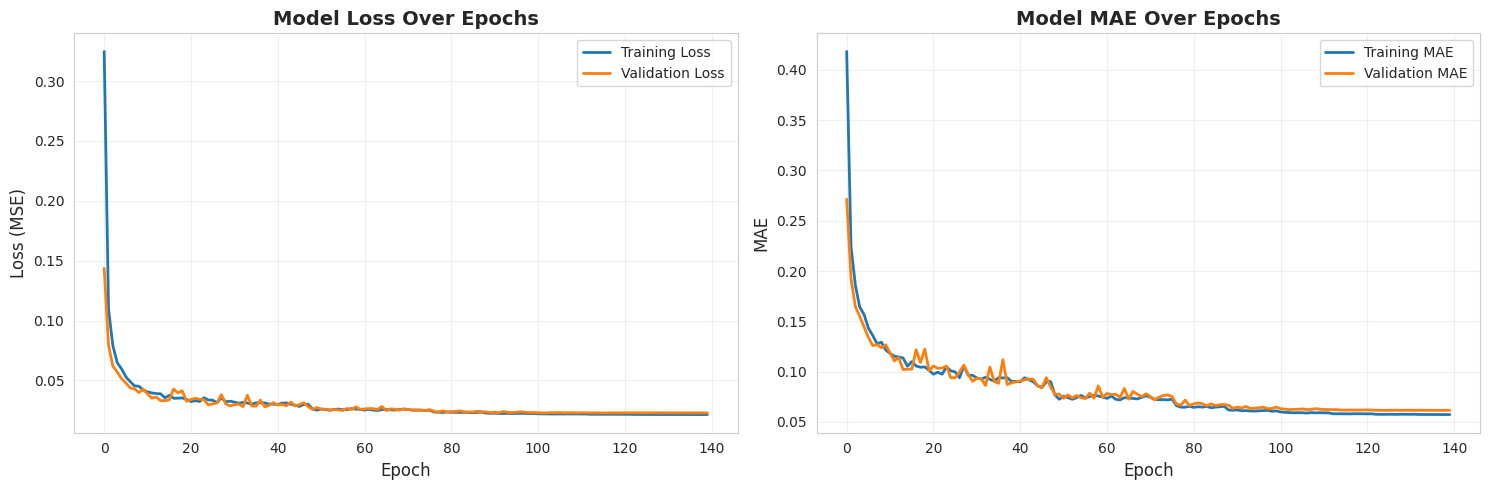

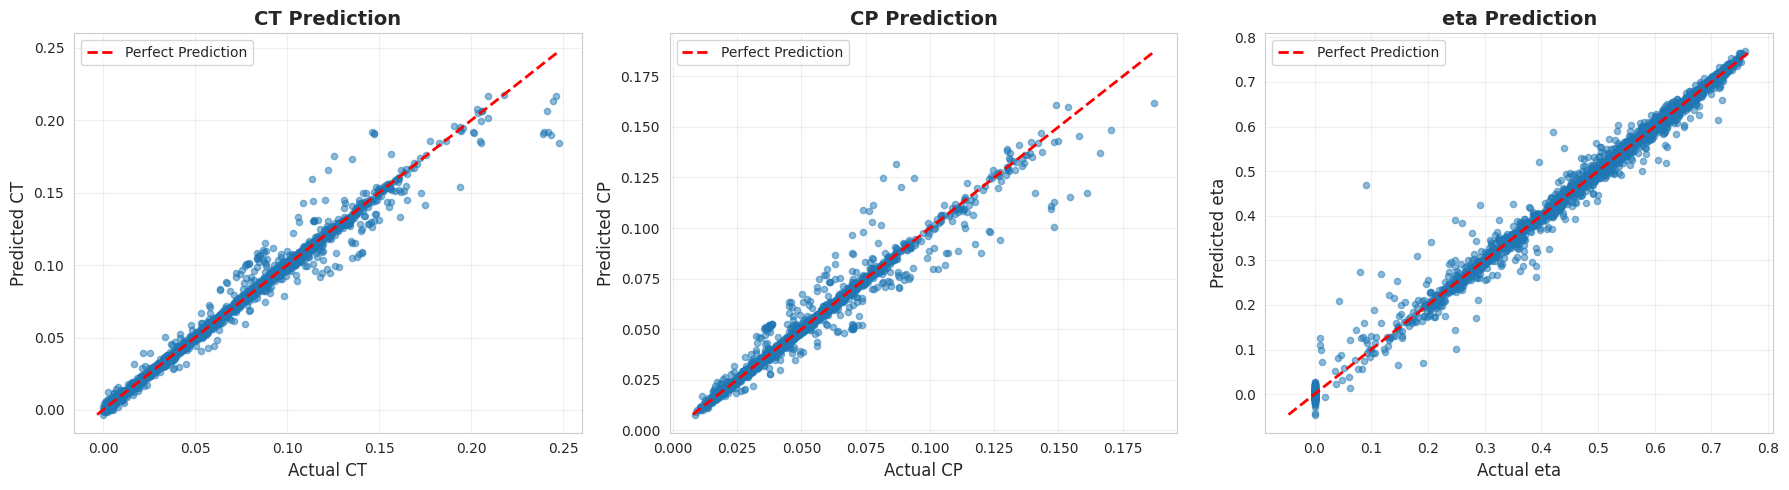


CONTOH PREDIKSI (10 Sample Pertama - Skala Asli)
   CT_Actual  CT_Pred  CT_Error  CP_Actual  CP_Pred  CP_Error  eta_Actual  \
0   0.016000 0.019252  0.003252   0.036800 0.038622  0.001822    0.350000   
1   0.001300 0.000240 -0.001060   0.012900 0.013161  0.000261    0.090000   
2   0.095900 0.092730 -0.003170   0.046400 0.045065 -0.001335    0.000000   
3   0.071200 0.072289  0.001089   0.051000 0.051694  0.000694    0.680000   
4   0.063194 0.062631 -0.000563   0.073512 0.071198 -0.002314    0.673998   
5   0.047000 0.044716 -0.002284   0.050500 0.049798 -0.000702    0.716000   
6   0.036805 0.038328  0.001523   0.053281 0.053186 -0.000095    0.488491   
7   0.064100 0.062951 -0.001149   0.023100 0.023455  0.000355    0.000000   
8   0.144649 0.128342 -0.016307   0.093384 0.080167 -0.013217    0.324308   
9   0.003900 0.002953 -0.000947   0.013600 0.013803  0.000203    0.249000   

   eta_Pred  eta_Error  
0  0.427421   0.077421  
1  0.121944   0.031944  
2 -0.007993  -0.007993  
3 

In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Model MAE Over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot predictions vs actual untuk setiap output
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, name in enumerate(output_names):
    axes[i].scatter(y_test_actual[:, i], y_pred[:, i], alpha=0.5, s=20)

    # Plot diagonal line (perfect prediction)
    min_val = min(y_test_actual[:, i].min(), y_pred[:, i].min())
    max_val = max(y_test_actual[:, i].max(), y_pred[:, i].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

    axes[i].set_xlabel(f'Actual {name}', fontsize=12)
    axes[i].set_ylabel(f'Predicted {name}', fontsize=12)
    axes[i].set_title(f'{name} Prediction', fontsize=14, fontweight='bold')
    axes[i].legend(fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tampilkan beberapa contoh prediksi (dalam skala asli/normal)
print("\n" + "="*50)
print("CONTOH PREDIKSI (10 Sample Pertama - Skala Asli)")
print("="*50)

# Buat DataFrame dengan format yang lebih jelas
comparison_df = pd.DataFrame({
    'CT_Actual': y_test_actual[:10, 0],
    'CT_Pred': y_pred[:10, 0],
    'CT_Error': y_pred[:10, 0] - y_test_actual[:10, 0],
    'CP_Actual': y_test_actual[:10, 1],
    'CP_Pred': y_pred[:10, 1],
    'CP_Error': y_pred[:10, 1] - y_test_actual[:10, 1],
    'eta_Actual': y_test_actual[:10, 2],
    'eta_Pred': y_pred[:10, 2],
    'eta_Error': y_pred[:10, 2] - y_test_actual[:10, 2]
})

# Format dengan 6 desimal
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
print(comparison_df)

# Reset format
pd.reset_option('display.float_format')

print("\n✅ Training selesai! Model terbaik tersimpan di 'best_propeller_model.keras'")

In [ ]:
print("\n" + "="*50)
print("METRICS PER OUTPUT ON TRAINING SET")
print("="*50)

# Predict on the training set
y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_train_actual = scaler_y.inverse_transform(y_pred_train_scaled)
y_train_actual = scaler_y.inverse_transform(y_train_scaled)

output_names = ['CT', 'CP', 'eta']

for i, name in enumerate(output_names):
    mse_train = mean_squared_error(y_train_actual[:, i], y_pred_train_actual[:, i])
    r2_train = r2_score(y_train_actual[:, i], y_pred_train_actual[:, i])
    mae_train = np.mean(np.abs(y_train_actual[:, i] - y_pred_train_actual[:, i]))

    print(f"\n{name} (Training Set):")
    print(f"  MSE: {mse_train:.6f}")
    print(f"  MAE: {mae_train:.6f}")
    print(f"  R² Score: {r2_train:.6f}")


METRICS PER OUTPUT ON TRAINING SET
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

CT (Training Set):
  MSE: 0.000035
  MAE: 0.002424
  R² Score: 0.980161

CP (Training Set):
  MSE: 0.000023
  MAE: 0.001819
  R² Score: 0.960467

eta (Training Set):
  MSE: 0.000317
  MAE: 0.009503
  R² Score: 0.994327


In [ ]:
# Load model dan scalers
import joblib

# Save scaler_X dan scaler_y
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

# **Model Testing**

In [ ]:
# ============================================================
# PREDiksi DENGAN INPUT MANUAL (40 FITUR)
# ============================================================

print("\n" + "="*70)
print("PREDIKSI DENGAN INPUT MANUAL (40 FITUR)")
print("="*70)
new_input_data = {
    'D_exp': [9.0],
    'P_exp': [5],
    'J': [0.2],
    'N': [4007.0],
    'c/R0': [0.16], 'beta0': [31.68],
    'c/R1': [0.146], 'beta1': [34.45],
    'c/R2': [0.144], 'beta2': [35.93],
    'c/R3': [0.143], 'beta3': [33.33],
    'c/R4': [0.143], 'beta4': [29.42],
    'c/R5': [0.146], 'beta5': [26.25],
    'c/R6': [0.151], 'beta6': [23.67],
    'c/R7': [0.155], 'beta7': [21.65],
    'c/R8': [0.158], 'beta8': [20.02],
    'c/R9': [0.16], 'beta9': [18.49],
    'c/R10': [0.159], 'beta10': [17.06],
    'c/R11': [0.155], 'beta11': [15.95],
    'c/R12': [0.146], 'beta12': [14.87],
    'c/R13': [0.133], 'beta13': [13.82],
    'c/R14': [0.114], 'beta14': [12.77],
    'c/R15': [0.089], 'beta15': [11.47],
    'c/R16': [0.056], 'beta16': [10.15],
    'c/R17': [0.022], 'beta17': [8.82]
}

X_manual_input = pd.DataFrame(new_input_data)

print("="*70)
print("INPUT DATA MANUAL (40 Fitur)")
print("="*70)
print(X_manual_input.T)  # Transpose agar lebih mudah dibaca

# Scale input menggunakan scaler yang sudah di-fit
X_manual_input_scaled = scaler_X.transform(X_manual_input)

# Prediksi
y_pred_scaled = model.predict(X_manual_input_scaled, verbose=0)

# Inverse transform untuk mendapatkan nilai asli
y_pred_manual = scaler_y.inverse_transform(y_pred_scaled)

print("\n" + "="*70)
print("PREDICTED OUTPUT")
print("="*70)
print(f"CT  : {y_pred_manual[0][0]:.6f}")
print(f"CP  : {y_pred_manual[0][1]:.6f}")
print(f"eta : {y_pred_manual[0][2]:.6f}")

print("\n" + "="*70)
print("✅ Prediksi Selesai!")
print("="*70)



PREDIKSI DENGAN INPUT MANUAL (40 FITUR)
INPUT DATA MANUAL (40 Fitur)
               0
D_exp      9.000
P_exp      5.000
J          0.200
N       4007.000
c/R0       0.160
beta0     31.680
c/R1       0.146
beta1     34.450
c/R2       0.144
beta2     35.930
c/R3       0.143
beta3     33.330
c/R4       0.143
beta4     29.420
c/R5       0.146
beta5     26.250
c/R6       0.151
beta6     23.670
c/R7       0.155
beta7     21.650
c/R8       0.158
beta8     20.020
c/R9       0.160
beta9     18.490
c/R10      0.159
beta10    17.060
c/R11      0.155
beta11    15.950
c/R12      0.146
beta12    14.870
c/R13      0.133
beta13    13.820
c/R14      0.114
beta14    12.770
c/R15      0.089
beta15    11.470
c/R16      0.056
beta16    10.150
c/R17      0.022
beta17     8.820

PREDICTED OUTPUT
CT  : 0.083756
CP  : 0.044781
eta : 0.368421

✅ Prediksi Selesai!


# **GENETIC ALGORITHM**

In [ ]:
for x in input_features:
    print(df[x].describe())

count    14211.000000
mean         8.913091
std          2.821632
min          2.244094
25%          9.000000
50%          9.000000
75%         11.000000
max         19.000000
Name: D_exp, dtype: float64
count    14211.000000
mean         5.869350
std          2.240271
min          0.787402
25%          4.300000
50%          6.000000
75%          7.000000
max         13.000000
Name: P_exp, dtype: float64
count    14211.000000
mean         0.395534
std          0.265259
min          0.000000
25%          0.184000
50%          0.406000
75%          0.592083
max          1.198988
Name: J, dtype: float64
count    14211.000000
mean      5906.956654
std       3444.377137
min       1261.000000
25%       4010.000000
50%       5037.000000
75%       6043.000000
max      27050.000000
Name: N, dtype: float64
count    14211.000000
mean         0.152732
std          0.043307
min          0.080700
25%          0.123700
50%          0.152000
75%          0.167000
max          0.312200
Name: c/R0, dtyp

Generation   1 | Fitness: 0.943444 | Pred: CT=0.0708, CP=0.0647, eta=0.9112 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  11 | Fitness: 0.957947 | Pred: CT=0.1014, CP=0.0835, eta=0.8951 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  21 | Fitness: 0.964713 | Pred: CT=0.1193, CP=0.0918, eta=0.8771 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  31 | Fitness: 0.969397 | Pred: CT=0.1310, CP=0.0982, eta=0.8821 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  41 | Fitness: 0.972982 | Pred: CT=0.1396, CP=0.1063, eta=0.8879 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  51 | Fitness: 0.976448 | Pred: CT=0.1503, CP=0.1146, eta=0.8786 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  61 | Fitness: 0.979223 | Pred: CT=0.1581, CP=0.1194, eta=0.8881 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  71 | Fitness: 0.982172 | Pred: CT=0.1676, CP=0.1290, eta=0.8863 | Target: CT=0.3, CP=0.15, eta=0.9
Generation  81 | Fitness: 0.984021 | Pred: CT=0.1741, CP=0.1302, eta=0.8975 | Target: CT=0.3, CP=0.15, eta=0.9
G

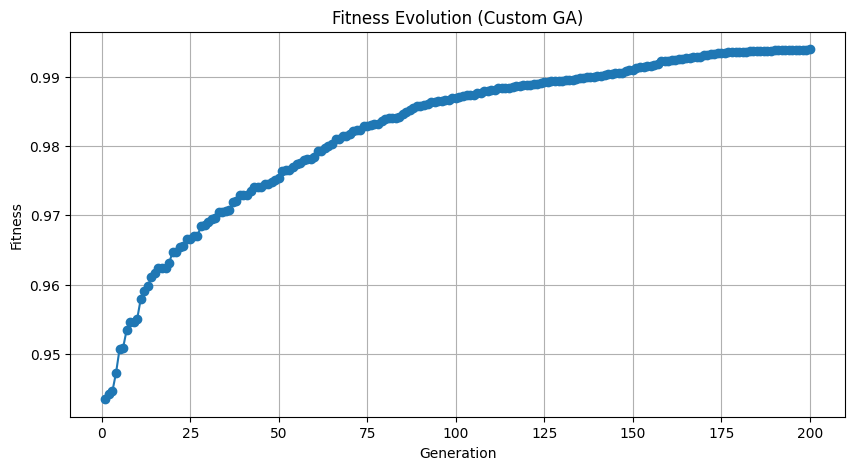

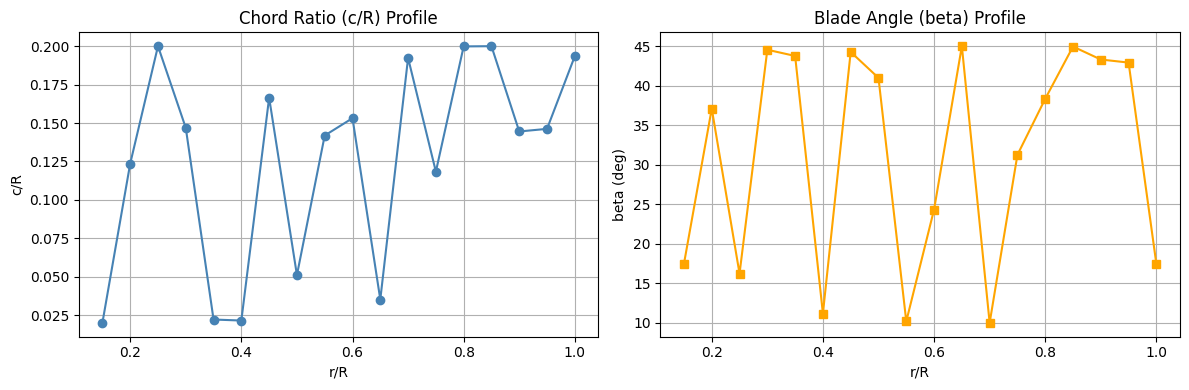

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from joblib import load
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Model & Scalers
# -----------------------------
model = keras.models.load_model('/content/best_propeller_model.keras')
scaler_X = load('/content/scaler_X (1).pkl')
scaler_y = load('/content/scaler_y (1).pkl')

# Original input feature order (pastikan ini sesuai dengan saat training!)
input_features = ['D_exp', 'P_exp', 'J', 'N']
for i in range(18):
    input_features.append(f'c/R{i}')
    input_features.append(f'beta{i}')

# -----------------------------
# 2. Fitness & Prediksi Aman
# -----------------------------
def predict_performance_safe(D, P, cR, beta, N, J):
    if len(cR) != 18 or len(beta) != 18:
        return None, None, None

    # Validasi rentang
    if not (2 <= D <= 20): return None, None, None
    if not (0.5 <= P <= 15): return None, None, None
    if not all(0.02 <= x <= 0.20 for x in cR): return None, None, None
    if not all(10.0 <= b <= 45.0 for b in beta): return None, None, None

    # ✅ Buat DataFrame dengan nama kolom yang sesuai → hindari warning scaler
    input_dict = {
        'D_exp': [D],
        'P_exp': [P],
        'J': [J],
        'N': [N]
    }
    for i in range(18):
        input_dict[f'c/R{i}'] = [cR[i]]
        input_dict[f'beta{i}'] = [beta[i]]

    try:
        X_df = pd.DataFrame(input_dict)  # Sekarang punya kolom yang benar
        X_scaled = scaler_X.transform(X_df)
        y_scaled = model.predict(X_scaled, verbose=0)
        y = scaler_y.inverse_transform(y_scaled)[0]
    except Exception as e:
        # print("Error in prediction:", e)  # uncomment if debugging
        return None, None, None

    CT, CP, eta = y[0], y[1], y[2]

    # Filter hasil tidak fisik
    if not (-0.5 <= CT <= 1.0) or not (-0.5 <= CP <= 1.0) or not (0.0 <= eta <= 1.1):
        return None, None, None

    return float(CT), float(CP), float(eta)


def fitness(CT, CP, eta, target_CT, target_CP, target_eta, weights=(1.0, 1.0, 1.0)):
    if CT is None or CP is None or eta is None:
        return 0.0  # fitness sangat buruk
    w1, w2, w3 = weights
    error = w1*(CT - target_CT)**2 + w2*(CP - target_CP)**2 + w3*(eta - target_eta)**2
    return 1.0 / (1.0 + error)


# -----------------------------
# 3. Inisialisasi Populasi
# -----------------------------
def random_individual():
    D = np.random.uniform(2, 20)
    P = np.random.uniform(0.5, 15)
    cR = np.random.uniform(0.02, 0.20, 18)
    beta = np.random.uniform(10.0, 45.0, 18)
    return np.concatenate([[D, P], cR, beta])

def mutate(individual, mutation_rate=0.1, mutation_strength=0.1):
    mutated = individual.copy()
    for i in range(len(mutated)):
        if np.random.rand() < mutation_rate:
            if i == 0:  # D
                mutated[i] = np.clip(mutated[i] + np.random.normal(0, mutation_strength*5), 2, 20)
            elif i == 1:  # P
                mutated[i] = np.clip(mutated[i] + np.random.normal(0, mutation_strength*2), 0.5, 15)
            elif 2 <= i < 20:  # c/R
                mutated[i] = np.clip(mutated[i] + np.random.normal(0, mutation_strength*0.05), 0.02, 0.20)
            else:  # beta
                mutated[i] = np.clip(mutated[i] + np.random.normal(0, mutation_strength*5), 10.0, 45.0)
    return mutated

def crossover(parent1, parent2):
    # Single-point crossover
    point = np.random.randint(1, len(parent1)-1)
    child = np.concatenate([parent1[:point], parent2[point:]])
    return child


# -----------------------------
# 4. Jalankan GA
# -----------------------------
def run_ga(
    target_CT=0.12,
    target_CP=0.08,
    target_eta=0.75,
    N=5000,
    J=0.5,
    weights=(1.0, 1.0, 1.0),
    pop_size=50,
    generations=100,
    mutation_rate=0.15,
    elite_size=5,
    random_seed=42
):
    np.random.seed(random_seed)

    # Inisialisasi populasi
    population = [random_individual() for _ in range(pop_size)]
    history = {'generation': [], 'best_fitness': [], 'best_perf': []}

    for gen in range(generations):
        # Evaluasi fitness
        fitness_scores = []
        performances = []

        for ind in population:
            D, P = ind[0], ind[1]
            cR = ind[2:20]
            beta = ind[20:38]
            CT, CP, eta = predict_performance_safe(D, P, cR, beta, N, J)
            f = fitness(CT, CP, eta, target_CT, target_CP, target_eta, weights)
            fitness_scores.append(f)
            performances.append((CT, CP, eta))

        # Sort by fitness (descending)
        sorted_idx = np.argsort(fitness_scores)[::-1]
        population = [population[i] for i in sorted_idx]
        fitness_scores = [fitness_scores[i] for i in sorted_idx]
        performances = [performances[i] for i in sorted_idx]

        # Simpan histori
        best_perf = performances[0]
        history['generation'].append(gen+1)
        history['best_fitness'].append(fitness_scores[0])
        history['best_perf'].append(best_perf)

        if gen % 10 == 0:
          CT_b, CP_b, eta_b = best_perf
          # Jika None, ganti dengan placeholder
          CT_str = f"{CT_b:.4f}" if CT_b is not None else "N/A"
          CP_str = f"{CP_b:.4f}" if CP_b is not None else "N/A"
          eta_str = f"{eta_b:.4f}" if eta_b is not None else "N/A"

          print(f"Generation {gen+1:3d} | Fitness: {fitness_scores[0]:.6f} | "
                f"Pred: CT={CT_str}, CP={CP_str}, eta={eta_str} | "
                f"Target: CT={target_CT}, CP={target_CP}, eta={target_eta}")

        # Elitisme
        elite = population[:elite_size]

        # Buat generasi baru
        new_population = elite.copy()
        while len(new_population) < pop_size:
            # Tournament selection (sederhana: pilih 2 random, ambil yang lebih baik)
            i1, i2 = np.random.choice(len(population), size=2, replace=False)
            parent1 = population[i1] if fitness_scores[i1] > fitness_scores[i2] else population[i2]
            parent2 = random_individual()  # atau crossover
            # Optional: gunakan crossover
            # child = crossover(parent1, random.choice(population))
            child = mutate(parent1, mutation_rate=mutation_rate)
            new_population.append(child)

        population = new_population

       # === Evaluasi populasi akhir secara lengkap ===
    final_fitness = []
    final_performances = []

    for ind in population:
        D, P = ind[0], ind[1]
        cR = ind[2:20]
        beta = ind[20:38]
        CT, CP, eta = predict_performance_safe(D, P, cR, beta, N, J)
        f = fitness(CT, CP, eta, target_CT, target_CP, target_eta, weights)
        final_fitness.append(f)
        final_performances.append((CT, CP, eta))

    # Gabungkan dan urutkan berdasarkan fitness (descending)
    combined = list(zip(population, final_fitness, final_performances))
    combined.sort(key=lambda x: x[1], reverse=True)

    # Ambil solusi terbaik
    best_ind, best_fit, best_perf = combined[0]
    CT, CP, eta = best_perf
    D, P = best_ind[0], best_ind[1]
    print("\n✅ OPTIMISASI SELESAI")
    print(f"Final Prediction: CT={CT:.6f}, CP={CP:.6f}, eta={eta:.6f}")
    print(f"Geometry: D={D:.2f}, P={P:.2f}")

    # Simpan top-N solusi (misal: 5)
    top_n = 5
    top_solutions = []
    for i in range(min(top_n, len(combined))):
        ind, fit, perf = combined[i]
        CT_i, CP_i, eta_i = perf
        sol_dict = {
            'rank': i + 1,
            'fitness': fit,
            'D': float(ind[0]),
            'P': float(ind[1]),
            'CT_pred': CT_i,
            'CP_pred': CP_i,
            'eta_pred': eta_i,
        }
        # Tambahkan semua c/R dan beta
        for j in range(18):
            sol_dict[f'c/R{j}'] = float(ind[2 + j])
        for j in range(18):
            sol_dict[f'beta{j}'] = float(ind[20 + j])
        top_solutions.append(sol_dict)

    return {
        'best_geometry': best_ind,
        'best_performance': best_perf,
        'top_solutions': top_solutions,  # <-- ini yang baru
        'history': history
    }


# -----------------------------
# 5. Jalankan
# -----------------------------
result = run_ga(
    target_CT=0.3,
    target_CP=0.15,
    target_eta=0.9,
    N=6000,
    J=0.7,
    pop_size=40,
    generations=200,
    mutation_rate=0.3,
    elite_size=4,
    random_seed=42
)

# Tampilkan top 5 solusi
print("\n" + "="*80)
print("TOP 5 SOLUSI TERBAIK")
print("="*80)

for sol in result['top_solutions']:
    print(f"\n🔹 Rank #{sol['rank']} | Fitness: {sol['fitness']:.6f}")
    print(f"   D = {sol['D']:.3f} in,  P = {sol['P']:.3f} in")
    print(f"   Pred: CT = {sol['CT_pred']:.6f}, CP = {sol['CP_pred']:.6f}, η = {sol['eta_pred']:.6f}")
    print(f"   c/R  = {[round(sol[f'c/R{i}'], 4) for i in range(18)]}")
    print(f"   beta = {[round(sol[f'beta{i}'], 2) for i in range(18)]}")

# Opsional: Simpan ke CSV
df_top = pd.DataFrame(result['top_solutions'])
df_top.to_csv('top_blade_solutions.csv', index=False)
print(f"\n✅ Top {len(result['top_solutions'])} solusi disimpan ke 'top_blade_solutions.csv'")

# Plot fitness
plt.figure(figsize=(10, 5))
plt.plot(result['history']['generation'], result['history']['best_fitness'], '-o')
plt.title('Fitness Evolution (Custom GA)')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()


# Plot profil geometri solusi terbaik
best = result['top_solutions'][0]
r_R = np.linspace(0.15, 1.0, 18)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(r_R, [best[f'c/R{i}'] for i in range(18)], 'o-', color='steelblue')
plt.title('Chord Ratio (c/R) Profile')
plt.xlabel('r/R')
plt.ylabel('c/R')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(r_R, [best[f'beta{i}'] for i in range(18)], 's-', color='orange')
plt.title('Blade Angle (beta) Profile')
plt.xlabel('r/R')
plt.ylabel('beta (deg)')
plt.grid(True)

plt.tight_layout()
plt.show()